In [7]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2


import flotilla
study = flotilla.embark('singlecell_pnm_figure6_splicing_correlation_track_examples', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-12-22 10:54:06	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure6_splicing_correlation_track_examples/datapackage.json
2016-12-22 10:54:06	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-12-22 10:54:41 	Initializing Study
2016-12-22 10:54:41 	Initializing Predictor configuration manager for Study
2016-12-22 10:54:41	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-12-22 10:54:41	Added ExtraTreesClassifier to default predictors
2016-12-22 10:54:41	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-12-22 10:54:41	Added ExtraTreesRegressor to default predictors
2016-12-22 10:54:41	Predictor GradientBoostingClassifier is of type <class 'sklearn.

Error loading species hg19 data: HTTP Error 404: Not Found

In [8]:
folder = 'figures'

In [9]:
figure_folder = 'figures/014_bimodal_correlations_GO_analysis'
! mkdir -p $figure_folder

In [10]:
splicing_expression_corr_tidy = study.supplemental.splicing_expression_corr
splicing_expression_corr_tidy = splicing_expression_corr_tidy.loc[splicing_expression_corr_tidy['Pearson R'].abs() > 0.5]
splicing_expression_corr_tidy = splicing_expression_corr_tidy.join(study.expression.feature_data['gene_name'], on='Expression Gene')
splicing_expression_corr_tidy['Correlation Direction'] = splicing_expression_corr_tidy['Pearson R'].map(
    lambda x: '(+) Positive' if x > 0 else '(-) Negative')
print(splicing_expression_corr_tidy.shape)
splicing_expression_corr_tidy.head()

(3011, 8)


,Splicing Gene,phenotype,Expression Gene,Pearson R,event_id,modality,gene_name,Correlation Direction
66,BRD8-event1,NPC,ENSG00000005436,-0.538949,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GCFC2,(-) Negative
176,BRD8-event1,NPC,ENSG00000010310,-0.519802,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GIPR,(-) Negative
483,BRD8-event1,NPC,ENSG00000050438,-0.509080,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SLC4A8,(-) Negative
875,BRD8-event1,NPC,ENSG00000073060,-0.602362,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SCARB1,(-) Negative
1277,BRD8-event1,NPC,ENSG00000088682,-0.588166,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,COQ9,(-) Negative


In [11]:
splicing_events = (('BRD8-event1', 'exon:chr5:137495758-137495862:- exon:chr5:137495244-137495288:- exon:chr5:137492571-137492956:-'),
                   ('BRD8-event2', 'exon:chr5:137500009-137500102:- exon:chr5:137499776-137499822:- exon:chr5:137498819-137499033:-'),
                   ("DYNC1I2", 'exon:chr2:172563743-172563887:+ exon:chr2:172569277-172569336:+ exon:chr2:172571838-172571878:+'),
                   ('EIF5', 'exon:chr14:103800339-103800597:+ exon:chr14:103800726-103800934:+ exon:chr14:103801990-103802269:+'),
                   ('EIF6', 'exon:chr20:33871979-33872295:- exon:chr20:33868457-33868632:- exon:chr20:33867745-33867921:-'),
                   ("MDM4", 'exon:chr1:204501319-204501374:+ exon:chr1:204506558-204506625:+ exon:chr1:204507337-204507436:+'),
                   ("MEAF6", 'exon:chr1:37967405-37967597:- exon:chr1:37962308-37962337:- exon:chr1:37961475-37961519:-'),
                   ("RPN2", 'exon:chr20:35864983-35865112:+ exon:chr20:35866805-35866852:+ exon:chr20:35869706-35869820:+'),
                   ('SUGT1', 'exon:chr13:53233314-53233384:+ exon:chr13:53235610-53235705:+ exon:chr13:53236784-53236837:+'),
                   ('PKM', 'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-'),
                   ('SNAP25', 'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'),
                   ('SMARCE1', 'exon:chr17:38801828-38801871:- exon:chr17:38798707-38798811:- exon:chr17:38793744-38793824:-'))

splicing_events = list(((x, '@'.join(y.split())) for x, y in splicing_events))
splicing_events

[('BRD8-event1',
  'exon:chr5:137495758-137495862:-@exon:chr5:137495244-137495288:-@exon:chr5:137492571-137492956:-'),
 ('BRD8-event2',
  'exon:chr5:137500009-137500102:-@exon:chr5:137499776-137499822:-@exon:chr5:137498819-137499033:-'),
 ('DYNC1I2',
  'exon:chr2:172563743-172563887:+@exon:chr2:172569277-172569336:+@exon:chr2:172571838-172571878:+'),
 ('EIF5',
  'exon:chr14:103800339-103800597:+@exon:chr14:103800726-103800934:+@exon:chr14:103801990-103802269:+'),
 ('EIF6',
  'exon:chr20:33871979-33872295:-@exon:chr20:33868457-33868632:-@exon:chr20:33867745-33867921:-'),
 ('MDM4',
  'exon:chr1:204501319-204501374:+@exon:chr1:204506558-204506625:+@exon:chr1:204507337-204507436:+'),
 ('MEAF6',
  'exon:chr1:37967405-37967597:-@exon:chr1:37962308-37962337:-@exon:chr1:37961475-37961519:-'),
 ('RPN2',
  'exon:chr20:35864983-35865112:+@exon:chr20:35866805-35866852:+@exon:chr20:35869706-35869820:+'),
 ('SUGT1',
  'exon:chr13:53233314-53233384:+@exon:chr13:53235610-53235705:+@exon:chr13:53236784

In [1]:
import goatools
import collections
import mygene


GO_KEYS_FULL = 'go.BP', 'go.MF', 'go.CC'
GO_KEYS_SPLIT = [x.split('.')[1] for x in GO_KEYS_FULL]


def parse_mygene_output(mygene_output):
    """Convert mygene.querymany output to a gene id to go term mapping (dictionary)

    Parameters
    ----------
    mygene_output : dict or list
        Dictionary (returnall=True) or list (returnall=False) of
        output from mygene.querymany

    Output
    ------
    gene_name_to_go : dict
        Mapping of gene name to a set of GO ids
    """
    # if "returnall=True" was specified, need to get just the "out" key
    if isinstance(mygene_output, dict):
        mygene_output = mygene_output['out']

    gene_name_to_go = collections.defaultdict(set)

    for line in mygene_output:
        gene_name = line['query']
        try:
            go_output = line['go']
        except KeyError:
            continue
        for go_key in GO_KEYS_SPLIT:
            try:
                go_terms = go_output[go_key]
            except KeyError:
                continue
            if isinstance(go_terms, dict):
                go_ids = set([go_terms['id']])
            else:
                go_ids = set(x['id'] for x in go_terms)
        gene_name_to_go[gene_name] |= go_ids
    return gene_name_to_go


def gene_ids_to_go(gene_ids, species='human,mouse,rat',
                   scopes='entrezgene,ensemblgene,retired,symbol',
                   fields=GO_KEYS_FULL,
                   **kwargs):
    """Get associated GO terms for each gene ID

    gene_ids : iterable of ids
        List of gene ids that you want to map
    species : str
        Comma-separated species to limit search. Default is "human,mouse,rat"
    scopes : str
        Comma-separated type of gene ids that you are giving.
        Default is "entrezgene,ensemblgene,retired,symbol"
    fields : iterable
        GO terms to use. Default is ['go.BP', 'go.MF', 'go.CC']

    Returns
    -------
    gene_to_go : dict
        Mapping of each provided gene id to a set object of GO terms
    """

    mg = mygene.MyGeneInfo()

    mygene_output = mg.querymany(gene_ids, fields=fields, scopes=scopes,
                                 species=species, **kwargs)

    gene_name_to_go = parse_mygene_output(mygene_output)
    return gene_name_to_go



from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()

# Show the filename
obo_fname


obo_dag = goatools.obo_parser.GODag(obo_file=obo_fname)

  EXISTS: go-basic.obo


'go-basic.obo'

In [37]:
single_metadata = study.metadata.data.query('single == True')

outlier_colors = pd.Series(['lightgrey' if x else 'black' for x in single_metadata['outlier']], 
                           index=single_metadata.index)
outlier_colors[:5]

CVN_01    black
CVN_02    black
CVN_03    black
CVN_04    black
CVN_05    black
dtype: object

In [38]:
single_expression = study.expression.singles
print(single_expression.shape)
single_expression.head()

(206, 18594)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0.0,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0.0,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0.0,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0.0,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0.0,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [39]:
gene_filter = (single_expression > 1).sum() >= 30
gene_filter.sum()

14314

In [40]:
single_expression = single_expression.loc[:, gene_filter]
print(single_expression.shape)
single_expression.head()

(206, 14314)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000178605,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,7.703080,...,3.29961,1.774580,0.080647,0.291587,1.017003,6.998972,0.153573,0.119524,0.000000,2.905205
CVN_02,5.338678,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,6.666089,...,0.00000,4.323377,0.495262,0.000000,0.568696,0.000000,0.000000,0.116144,0.087565,3.746504
CVN_03,0.146438,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,0.000000,...,0.00000,0.225987,0.000000,0.000000,0.330164,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,5.373481,...,0.00000,1.646223,0.562974,0.000000,0.223287,0.195424,0.000000,1.601383,0.205765,1.533982
CVN_05,7.531459,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,8.701198,...,0.00000,0.900241,0.353069,0.000000,0.646603,6.631383,0.000000,0.096939,0.133075,0.553417


In [41]:
splicing_to_correlate = pd.DataFrame(dict((gene, study.splicing.singles[event_id].dropna()) 
                                          for gene, event_id in splicing_events))
print(splicing_to_correlate.shape)
splicing_to_correlate.head()

(196, 12)


,BRD8-event1,BRD8-event2,DYNC1I2,EIF5,EIF6,MDM4,MEAF6,PKM,RPN2,SMARCE1,SNAP25,SUGT1
CVN_01,NaN,NaN,NaN,1.0,NaN,1.000000,0.0,0.000000,0.350598,1.0,NaN,0.250000
CVN_02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,0.000000,1.0,NaN,0.000000
CVN_03,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,1.0,NaN,0.000000,0.0,0.000000,0.213058,NaN,NaN,0.000000
CVN_05,NaN,NaN,NaN,1.0,0.0,0.692308,0.0,0.348754,0.000000,1.0,NaN,0.292383


In [42]:

# Initialize the "mygene.info" (http://mygene.info/) interface


mg = mygene.MyGeneInfo()

mygene_output = mg.querymany(single_expression.columns, 
                             scopes='ensemblgene', fields=['go.BP', 'go.MF', 'go.CC'], species='human', 
                             returnall=True)

gene_name_to_go = parse_mygene_output(mygene_output)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-14314...done.
Finished.
6 input query terms found dup hits:
	[(u'ENSG00000183889', 3), (u'ENSG00000215126', 2), (u'ENSG00000229719', 2), (u'ENSG00000236107', 2),
427 input query terms found no hit:
	[u'ENSG00000005955', u'ENSG00000006114', u'ENSG00000017373', u'ENSG00000017621', u'ENSG00000034063',


In [43]:
len(gene_name_to_go)

10692

In [44]:
go_enrichers = {}

for phenotype, expression in single_expression.groupby(study.sample_id_to_phenotype):
    gene_filter = (expression > 1).sum() >= 10
    go_enrichers[phenotype] = goatools.GOEnrichmentStudy(gene_filter[gene_filter].index, gene_name_to_go, obo_dag)

Propagating term counts to parents ..
Propagating term counts to parents ..

 9,661 out of 12,979 population items found in association
 9,915 out of 13,219 population items found in association



Propagating term counts to parents ..

 9,821 out of 12,722 population items found in association


In [48]:
cols = ['phenotype', 'Splicing Gene', 'Correlation Direction']


dfs = []

for (phenotype, spliced_gene, direction), df in splicing_expression_corr_tidy.groupby(cols):
    print('---', phenotype, spliced_gene, direction, '---')
    # "results" is a list and is annoying to deal with ... 
    # ... so we'll make a dataframe in the next step
    results = go_enrichers[phenotype].run_study(df['Expression Gene'])

    # Create a dataframe of the results so it's easier to deal with
    df = pd.DataFrame([r.__dict__ for r in results])
    df['phenotype'] = phenotype
    df['spliced_gene'] = spliced_gene
    df['direction'] = direction
    dfs.append(df)
go_enrichment = pd.concat(dfs)
print(go_enrichment.shape)
go_enrichment.head()

--- MN EIF5 (-) Negative ---
Calculating uncorrected p-values using Fisher's exact test
   149 out of    193 study items found in association
Running multitest correction: local bonferroni
Running multitest correction: local sidak
Running multitest correction: local holm
2,082 GO terms are associated with 149 of 193 study items in a population of 12,979
--- MN EIF6 (+) Positive ---
Calculating uncorrected p-values using Fisher's exact test
     0 out of      2 study items found in association
Running multitest correction: local bonferroni
Running multitest correction: local sidak
Running multitest correction: local holm
2,082 GO terms are associated with 0 of 2 study items in a population of 12,979
--- MN EIF6 (-) Negative ---
Calculating uncorrected p-values using Fisher's exact test
    22 out of     29 study items found in association
Running multitest correction: local bonferroni
Running multitest correction: local sidak
Running multitest correction: local holm
2,082 GO terms are a

,GO,NS,_methods,enrichment,goterm,name,p_bonferroni,p_holm,p_sidak,p_uncorrected,...,pop_items,pop_n,ratio_in_pop,ratio_in_study,study_count,study_items,study_n,phenotype,spliced_gene,direction
0,GO:0008150,BP,"[(local, bonferroni, bonferroni), (local, sida...",p,GO:0008150\tlevel-00\tdepth-00\tbiological_pro...,biological_process,1.0,1.0,1.0,1.0,...,"{ENSG00000153832, ENSG00000230873, ENSG0000010...",12979,"(36, 12979)","(0, 193)",0,{},193,MN,EIF5,(-) Negative
1,GO:0044699,BP,"[(local, bonferroni, bonferroni), (local, sida...",p,GO:0044699\tlevel-01\tdepth-01\tsingle-organis...,single-organism process,1.0,1.0,1.0,1.0,...,"{ENSG00000182010, ENSG00000118816, ENSG0000013...",12979,"(20, 12979)","(0, 193)",0,{},193,MN,EIF5,(-) Negative
2,GO:0012501,BP,"[(local, bonferroni, bonferroni), (local, sida...",p,GO:0012501\tlevel-04\tdepth-04\tprogrammed cel...,programmed cell death,1.0,1.0,1.0,1.0,...,"{ENSG00000179021, ENSG00000120159, ENSG0000009...",12979,"(4, 12979)","(0, 193)",0,{},193,MN,EIF5,(-) Negative
3,GO:0006915,BP,"[(local, bonferroni, bonferroni), (local, sida...",p,GO:0006915\tlevel-05\tdepth-05\tapoptotic proc...,apoptotic process,1.0,1.0,1.0,1.0,...,"{ENSG00000179021, ENSG00000120159, ENSG0000009...",12979,"(4, 12979)","(0, 193)",0,{},193,MN,EIF5,(-) Negative
4,GO:0006461,BP,"[(local, bonferroni, bonferroni), (local, sida...",p,GO:0006461\tlevel-05\tdepth-05\tprotein comple...,protein complex assembly,1.0,1.0,1.0,1.0,...,"{ENSG00000188997, ENSG00000136636, ENSG0000016...",12979,"(4, 12979)","(0, 193)",0,{},193,MN,EIF5,(-) Negative


In [96]:
p_cutoff = 0.1

go_enrichment_filtered = go_enrichment.query('p_bonferroni < @p_cutoff')
print(go_enrichment_filtered.shape)
# go_enrichment_filtered.head()
go_enrichment_filtered.groupby(['spliced_gene', 'phenotype', 'direction']).size()

(128, 21)


spliced_gene  phenotype  direction   
DYNC1I2       NPC        (-) Negative     5
              iPSC       (+) Positive    13
                         (-) Negative    34
MEAF6         NPC        (-) Negative     6
PKM           MN         (-) Negative    28
SMARCE1       MN         (+) Positive    40
SUGT1         MN         (-) Negative     2
dtype: int64

In [97]:
go_enrichment_filtered['-log10_p_bonferroni'] = -np.log10(go_enrichment_filtered['p_bonferroni'])
go_enrichment_filtered.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,GO,NS,_methods,enrichment,goterm,name,p_bonferroni,p_holm,p_sidak,p_uncorrected,...,pop_n,ratio_in_pop,ratio_in_study,study_count,study_items,study_n,phenotype,spliced_gene,direction,-log10_p_bonferroni
211,GO:0005913,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005913\tlevel-03\tdepth-04\tcell-cell adhe...,cell-cell adherens junction,1.290402e-07,1.290402e-07,1.257881e-07,6.197894e-11,...,12979,"(254, 12979)","(19, 146)",19,"{ENSG00000011426, ENSG00000074181, ENSG0000009...",146,MN,PKM,(-) Negative,6.889275
212,GO:0005911,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005911\tlevel-02\tdepth-02\tcell-cell junc...,cell-cell junction,2.868604e-07,2.867226e-07,2.796310e-07,1.377812e-10,...,12979,"(405, 12979)","(24, 146)",24,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",146,MN,PKM,(-) Negative,6.542329
213,GO:0070161,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0070161\tlevel-02\tdepth-02\tanchoring junc...,anchoring junction,6.434897e-06,6.428716e-06,6.272727e-06,3.090729e-09,...,12979,"(517, 12979)","(24, 146)",24,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",146,MN,PKM,(-) Negative,5.191458
214,GO:0005912,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005912\tlevel-03\tdepth-03\tadherens junct...,adherens junction,2.372450e-05,2.369031e-05,2.312660e-05,1.139505e-08,...,12979,"(509, 12979)","(23, 146)",23,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",146,MN,PKM,(-) Negative,4.624803
215,GO:0005575,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005575\tlevel-00\tdepth-00\tcellular_compo...,cellular_component,9.802850e-05,9.784016e-05,9.555801e-05,4.708381e-08,...,12979,"(9293, 12979)","(132, 146)",132,"{ENSG00000197956, ENSG00000144476, ENSG0000004...",146,MN,PKM,(-) Negative,4.008648


In [102]:
go_enrichment_filtered.groupby('NS').size()

NS
CC    128
dtype: int64

In [98]:
go_enrichment_filtered['spliced_gene_phenotype_direction'] = go_enrichment_filtered.apply(
    lambda x: '{}, {}, {}'.format(x['spliced_gene'], x['phenotype'], x['direction']), axis=1)
go_enrichment_filtered.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,GO,NS,_methods,enrichment,goterm,name,p_bonferroni,p_holm,p_sidak,p_uncorrected,...,ratio_in_pop,ratio_in_study,study_count,study_items,study_n,phenotype,spliced_gene,direction,-log10_p_bonferroni,spliced_gene_phenotype_direction
211,GO:0005913,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005913\tlevel-03\tdepth-04\tcell-cell adhe...,cell-cell adherens junction,1.290402e-07,1.290402e-07,1.257881e-07,6.197894e-11,...,"(254, 12979)","(19, 146)",19,"{ENSG00000011426, ENSG00000074181, ENSG0000009...",146,MN,PKM,(-) Negative,6.889275,"PKM, MN, (-) Negative"
212,GO:0005911,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005911\tlevel-02\tdepth-02\tcell-cell junc...,cell-cell junction,2.868604e-07,2.867226e-07,2.796310e-07,1.377812e-10,...,"(405, 12979)","(24, 146)",24,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",146,MN,PKM,(-) Negative,6.542329,"PKM, MN, (-) Negative"
213,GO:0070161,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0070161\tlevel-02\tdepth-02\tanchoring junc...,anchoring junction,6.434897e-06,6.428716e-06,6.272727e-06,3.090729e-09,...,"(517, 12979)","(24, 146)",24,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",146,MN,PKM,(-) Negative,5.191458,"PKM, MN, (-) Negative"
214,GO:0005912,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005912\tlevel-03\tdepth-03\tadherens junct...,adherens junction,2.372450e-05,2.369031e-05,2.312660e-05,1.139505e-08,...,"(509, 12979)","(23, 146)",23,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",146,MN,PKM,(-) Negative,4.624803,"PKM, MN, (-) Negative"
215,GO:0005575,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005575\tlevel-00\tdepth-00\tcellular_compo...,cellular_component,9.802850e-05,9.784016e-05,9.555801e-05,4.708381e-08,...,"(9293, 12979)","(132, 146)",132,"{ENSG00000197956, ENSG00000144476, ENSG0000004...",146,MN,PKM,(-) Negative,4.008648,"PKM, MN, (-) Negative"


In [99]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

In [100]:
sns.set(context='paper', style='white')

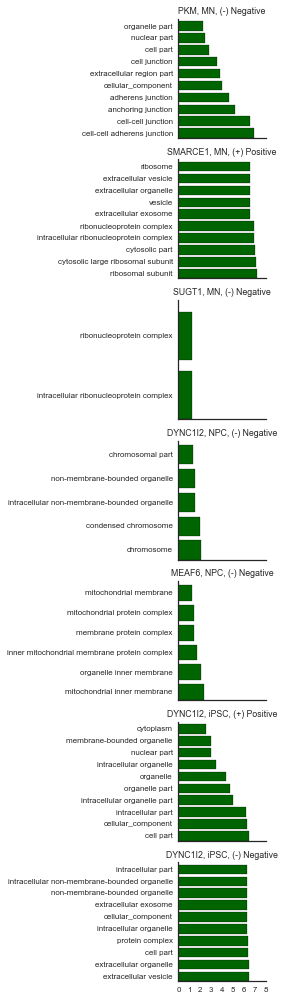

In [105]:
g = sns.FacetGrid(go_enrichment_filtered, row='spliced_gene_phenotype_direction', sharey=False, aspect=2, size=2)

g.map_dataframe(plot_go_enrichment, x_col='-log10_p_bonferroni', yticklabels='name', color='darkgreen')
g.set_titles('{row_name}')
g.savefig('{}/spliced_gene_phenotype_direction_go_enrichment.pdf'.format(figure_folder))